In [1]:
from scipy.datasets import ascent
ascent_image = ascent()

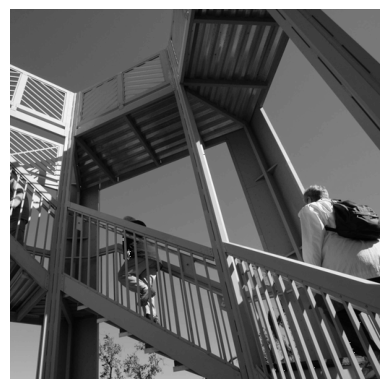

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [4]:
import numpy as np
image_transformed = np.copy(ascent_image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]
print(size_x)
print(size_y)

512
512


In [7]:
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#weight  = 1
weight  = 2

In [8]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
      convolution = convolution + (ascent_image[x, y] * filter[1][1])
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

      convolution = convolution * weight

      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      image_transformed[x, y] = convolution

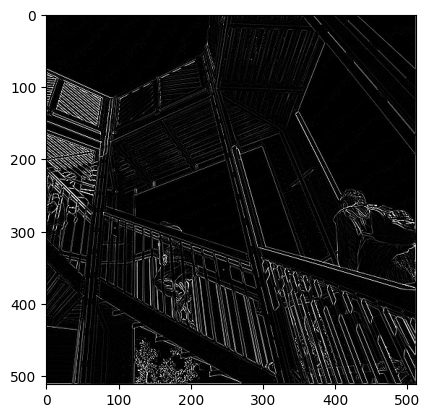

In [9]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

In [10]:
new_x = int(size_x/2)
new_y = int(size_y/2)

In [11]:
newImage = np.zeros((new_x, new_y))

In [12]:
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    newImage[int(x/2),int(y/2)] = max(pixels)

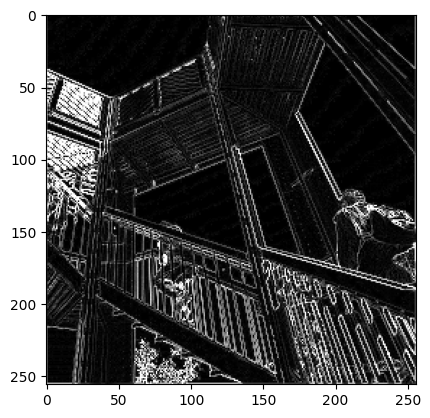

In [13]:
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()